# <a> Unsupervised Learning - Principal Components Analysis (PCA) </a>

*Andraws Steve Santos - Data Scientist*

# Motivation

Principal Component Analysis (PCA) is an incredibly useful tool in real-life situations, often underappreciated. More than just a "mathematical hammer," PCA has numerous practical applications that can be implemented in virtually any business or organization.

In this regard, marketing professionals are notably ahead of many other industries. One of the key applications lies in the segmentation of customers, users, suppliers, and more. Imagine a company looking to launch a new product, conducting research to better understand customer needs and desires, aiming to tailor marketing campaigns for the launch.

Questionnaires with dozens or even hundreds of responses pose challenges in analyzing and grouping similar segments. PCA comes to the rescue: reducing the dimensionality of responses from such questionnaires significantly enhances the understanding and application of cluster analysis.

This type of problem clearly has applicability across various sectors of the economy!

# Objec of Study

Real Case Study - (Grosse Pointe Associates and The “Microvan”) is available in the excellent book "Modern Marketing Research: Concepts, Methods, and Cases" ISBN 1133188966.

They launched a new concept for a car, a kind of microvan (larger than an SUV but smaller than a minivan), and want to identify the best target audience to kickstart their marketing campaigns.

The primary method to detect such trends is consumer primary research, usually starting with targeted focus groups and progressing to medium and eventually large-scale surveys. These surveys serve at least two purposes:

- Verify the "wants and needs" of a specific consumer group/niche.
- Along with demographic data, attempt to assess the profile of those who liked the microvan concept.

The business questions they want to answer are:

- What is the target segment for this car?
- What are the wants and needs of this segment?

They conducted various focus group surveys among potential buyers of these cars. Additionally, the marketing team examined a long list of potential attributes that could be important for microvan buyers, as well as lifestyle statements validated by their extensive previous research in the automotive industry. Based on detailed notes made during the focus group phase, they established a set of 30 attributes that seemed to capture the nature of the discussion, as well as important demographic variables. The goal is to use these attributes to capture key dimensions characterizing potential buyers and identify segments that they could create for their campaigns. Finally, a car (microvan) design was presented for potential consumers to rate from 1 to 9 if they liked it or not.

The challenge is that if they perform a cluster analysis with 30 features, the result will not be very intelligible, and it would be difficult to deduce customer profiles. They can reduce the dimensionality of the features to group those with similar variance (PCA) and then evaluate the result of this reduction in terms of customer interests. To assess the homogeneity of the groups, clustering alone is not enough, but with PCA, they can combine features with similar variance, which, for questionnaire responses, serves as a grouping of response profiles.

As in other projects, such as banking, telecommunications, retail, any company that provides services and has information about its customers can benefit from customer questionnaire analysis and principal component reduction, as we will construct in this project.

In [1]:
# Importing libraries for data reading and chart creation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# Configuring pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# Configuring pandas to not show scientific notation for numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Importing data
df_microvan = pd.read_csv('./data/microvan.csv')

In [3]:
# First visualization of the data
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
# Columns
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

## Understanding the columns:

- kidtrans: We need a car that helps transport our kids and their friends.
- miniboxy: Current minivans are just too boxy and large.
- lthrbetr: Leather seats are much better than fabric ones.
- secbiggr: If we had a second car, it would need to be larger than a standard sedan.
- safeimpt: Car safety is very important to me.
- buyhghnd: We tend to buy more sophisticated cars.
- pricqual: Car prices strongly reflect the underlying production quality.
- prmsound: A premium sound and entertainment system helps on long car trips.
- perfimpt: Performance is very important in a car.
- tkvacatn: We try to take as many vacations as possible.
- noparkrm: Our current residence doesn't have much parking space.
- homlrgst: Our house is among the largest in the neighborhood.
- envrminr: The environmental impact of cars is relatively small.
- needbetw: There needs to be something between a sedan and a minivan.
- suvcmpct: I prefer SUVs over minivans as they are more compact.
- next2str: My next car will be a two-seater.
- carefmny: We are careful with money.
- shdcarpl: I think everyone should carpool or use public transportation.
- imprtapp: Most of our appliances are imported.
- lk4whldr: Four-wheel drive is a very attractive option.
- kidsbulk: Our kids tend to bring a lot of bulky items and toys with them.
- wntguzlr: I will buy what I want even if it's a "gas guzzler."
- nordtrps: We don't take family trips.
- stylclth: We tend to buy stylish clothes for the family.
- strngwrn: Warranty protection needs to be strong in a new car.
- passnimp: Passion for work is more important than payment.
- twoincom: Our family would find it difficult to subsist on only one income.
- nohummer: I'm not interested in owning a vehicle like a Hummer.
- aftrschl: We engage in more after-school activities than most families.
- accesfun: Accessories really make the car more fun to drive.
- mvlinking: Potential customer liked the microvan concept.

## Demographic data of customers:

- age: Age of the respondent in years.
- income: Annual family income in thousands of dollars.
- miles: Total annual miles driven by family members in thousands of miles.
- numkids: Number of children (0-18 years old) residing in the household.
- female: Whether the respondent is a woman or not.
- educ: Respondent's level of education (1 = High school, 2 = Some college, 3 = Bachelor's degree, 4 = Postgraduate).
- recycle: Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more).

As no one will memorize this... how about we create a dictionary with the columns as keys and the descriptions as values?

In [5]:
# Let's transform the 'subjnumb' into the index of the dataframe
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [6]:
# create dictionary
data_dictionary = dict()

data_dictionary['kidtrans'] = 'We need a car that helps transport our kids and their friends.'
data_dictionary['miniboxy'] = 'Current minivans are just too boxy and large.'
data_dictionary['lthrbetr'] = 'Leather seats are much better than fabric ones.'
data_dictionary['secbiggr'] = 'If we had a second car, it would need to be larger than a standard sedan.'
data_dictionary['safeimpt'] = 'Car safety is very important to me.'
data_dictionary['buyhghnd'] = 'We tend to buy more sophisticated cars.'
data_dictionary['pricqual'] = 'Car prices strongly reflect the underlying production quality.'
data_dictionary['prmsound'] = 'A premium sound and entertainment system helps on long car trips.'
data_dictionary['perfimpt'] = 'Performance is very important in a car.'
data_dictionary['tkvacatn'] = 'We try to take as many vacations as possible.'
data_dictionary['noparkrm'] = 'Our current residence doesn\'t have much parking space.'
data_dictionary['homlrgst'] = 'Our house is among the largest in the neighborhood.'
data_dictionary['envrminr'] = 'The environmental impact of cars is relatively small.'
data_dictionary['needbetw'] = 'There needs to be something between a sedan and a minivan.'
data_dictionary['suvcmpct'] = 'I prefer SUVs over minivans as they are more compact.'
data_dictionary['next2str'] = 'My next car will be a two-seater.'
data_dictionary['carefmny'] = 'We are careful with money.'
data_dictionary['shdcarpl'] = 'I think everyone should carpool or use public transportation.'
data_dictionary['imprtapp'] = 'Most of our appliances are imported.'
data_dictionary['lk4whldr'] = 'Four-wheel drive is a very attractive option.'
data_dictionary['kidsbulk'] = 'Our kids tend to bring a lot of bulky items and toys with them.'
data_dictionary['wntguzlr'] = 'I will buy what I want even if it\'s a "gas guzzler".'
data_dictionary['nordtrps'] = 'We don\'t take family trips.'
data_dictionary['stylclth'] = 'We tend to buy stylish clothes for the family.'
data_dictionary['strngwrn'] = 'Warranty protection needs to be strong in a new car.'
data_dictionary['passnimp'] = 'Passion for work is more important than payment.'
data_dictionary['twoincom'] = 'Our family would find it difficult to subsist on only one income.'
data_dictionary['nohummer'] = 'I\'m not interested in owning a vehicle like a Hummer.'
data_dictionary['aftrschl'] = 'We engage in more after-school activities than most families.'
data_dictionary['accesfun'] = 'Accessories really make the car more fun to drive.'
data_dictionary['age'] = 'Age of the respondent in years.'
data_dictionary['income'] = 'Annual family income in thousands of dollars.'
data_dictionary['miles'] = 'Total annual miles driven by family members in thousands of miles.'
data_dictionary['numkids'] = 'Number of children (0-18 years old) residing in the household.'
data_dictionary['female'] = 'Whether the respondent is a woman or not.'
data_dictionary['educ'] = 'Respondent\'s level of education (1 = High school, 2 = Some college, 3 = Bachelor\'s degree, 4 = Postgraduate).'
data_dictionary['recycle'] = 'Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more).'

In [7]:
# Will it work???
data_dictionary['age'], data_dictionary['homlrgst']

('Age of the respondent in years.',
 'Our house is among the largest in the neighborhood.')

In [8]:
# Number of rows and columns
df_microvan.shape

(400, 38)

In [9]:
# Check data types
# We can see in advance that we don't have missing values
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

# <a> Starting with Descriptive Statistics </a>

Having a good understanding of statistical measures such as central tendency, dispersion, percentiles, and distributions is essential for gaining better insights into the data we are working with.

In [10]:
# Descriptive statistics of numerical variables
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## <a> Dimensionality Reduction with PCA! </a>

Let's now reduce dimensionality using Principal Component Analysis (PCA).
First, let's analyze how many components we'll use (the smallest number with the highest "explained" variance).

In [11]:
# Create a list to remove demographic columns and keep only the questionnaire variables (also remove 'mvliking')
# The intention is to keep only the questionnaire variables
demographic_columns_mvliking = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

In [12]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Test the number of components and calculate the explained variance for each
for num_components in range(1, 10):
    # Instantiate the PCA class with the number of components and the dataframe to be reduced
    pca = PCA(n_components=num_components, random_state=42).fit(df_microvan.drop(demographic_columns_mvliking, axis=1))
    explained_variance_ratio = pca.explained_variance_ratio_
    explained_variance_ratio = [round(var_ratio, 3) for var_ratio in explained_variance_ratio]
    
    total_explained_variance = round(sum(pca.explained_variance_ratio_), 3)
    
    print(f'{num_components} components with total explained variance of {total_explained_variance}: {explained_variance_ratio}')


1 components with total explained variance of 0.277: [0.277]
2 components with total explained variance of 0.445: [0.277, 0.168]
3 components with total explained variance of 0.546: [0.277, 0.168, 0.101]
4 components with total explained variance of 0.634: [0.277, 0.168, 0.101, 0.088]
5 components with total explained variance of 0.695: [0.277, 0.168, 0.101, 0.088, 0.061]
6 components with total explained variance of 0.716: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021]
7 components with total explained variance of 0.736: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019]
8 components with total explained variance of 0.754: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019, 0.018]
9 components with total explained variance of 0.772: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019, 0.018, 0.018]


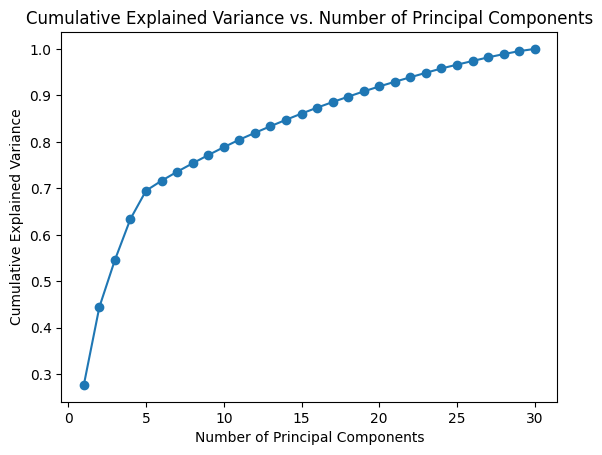

In [13]:
# Elbow Point
# Fit PCA to your dataset
pca = PCA().fit(df_microvan.drop(demographic_columns_mvliking, axis=1))

# Create the cumulative explained variance plot
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

When observing the cumulative explained variance plot, look for an "elbow" point where adding more components does not result in significant gains in explained variance. This point may indicate a balance between model complexity and the amount of retained information.

Here, there are several methods for choosing the number of PCA components. In this case, I will choose 5 because the difference between 4 and 5 PCs is greater than between 5 and 6. We still retain around 70% of the variance explainability.

In [14]:
# We chose the number of components as 5
pca = PCA(n_components=5, random_state=42).fit(df_microvan.drop(demographic_columns_mvliking, axis=1))

f'So, with five components, we have {sum(pca.explained_variance_ratio_) * 100}% of explained variance!'

'So, with five components, we have 69.49209280291693% of explained variance!'

## <a>Analysis of Components</a>

Each component is created as a "part" of the original variables. In other words, the original variables make up the principal components (remember the projection: the component is the projection of these variables). But how do we know the impact of each variable on the final projection? There is an attribute in the PCA object that shows these values for us.

In [15]:
# Composition of the 5 components from the 30 questionnaire variables
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Let's demonstrate that this array of numbers is, in fact, the composition of each component in relation to the original variables! We will also visualize the weights of each feature in the composition of the components graphically.

In [16]:
# Create a pandas dataframe with the column names of the questionnaires and input the components of each PCA listed above as data
df_component_composition = pd.DataFrame(columns=df_microvan.drop(demographic_columns_mvliking, axis=1).columns)

for i in range(5):
    df_component_composition.loc[i] = pca.components_[i]

df_component_composition

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


Here we can see that we have the 5 PCs in the rows with 30 columns representing the weight that each variable has for each PC

In [17]:
# For each component, let's choose the highest positive influence and the highest negative influence
# Not forgetting that in the negative influence, we need to negate the statement
for i in range(5):
    column_max = df_component_composition.columns[df_component_composition.loc[i].argmax()]
    column_min = df_component_composition.columns[df_component_composition.loc[i].argmin()]

    print(f'Component {i+1} positive impact: "{data_dictionary[column_max]}" and negative impact: "{data_dictionary[column_min]}"\n\n')

Component 1 positive impact: "We are careful with money." and negative impact: "We try to take as many vacations as possible."


Component 2 positive impact: "My next car will be a two-seater." and negative impact: "Current minivans are just too boxy and large."


Component 3 positive impact: "We engage in more after-school activities than most families." and negative impact: "We don't take family trips."


Component 4 positive impact: "Performance is very important in a car." and negative impact: "Car safety is very important to me."


Component 5 positive impact: "Car prices strongly reflect the underlying production quality." and negative impact: "I think everyone should carpool or use public transportation."




#### <a>Graphically Analyzing the Weights of Each Variable in the Principal Components</a>

<Axes: >

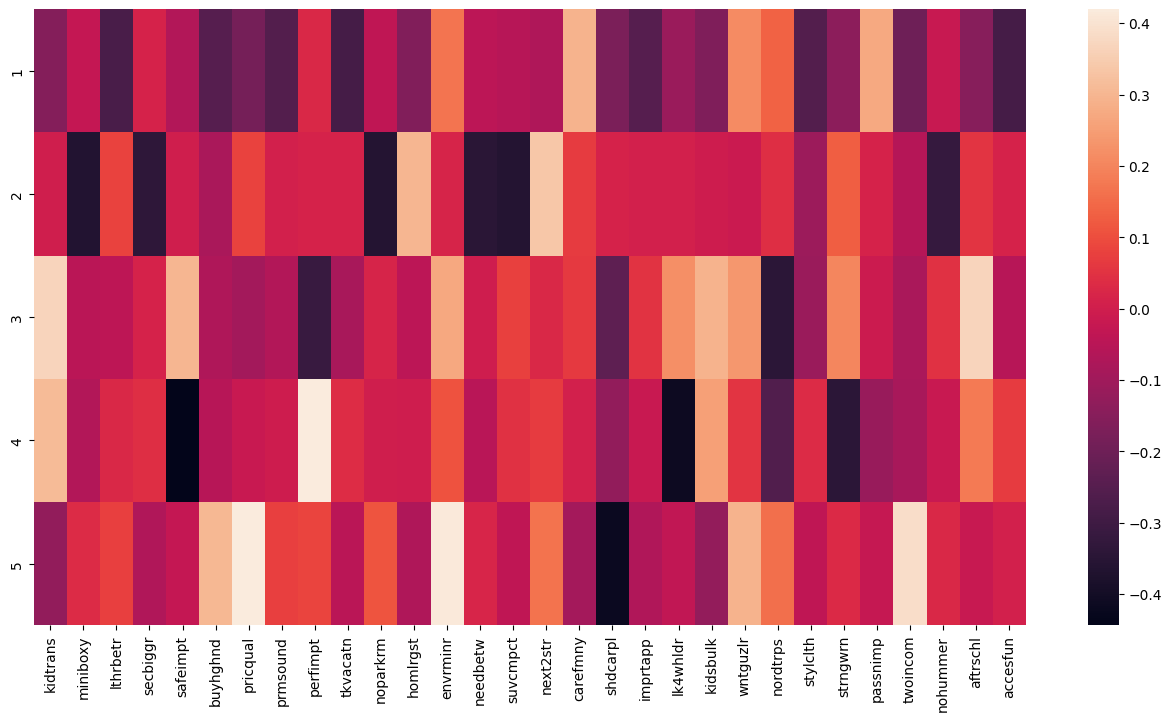

In [18]:
# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(data=df_component_composition, yticklabels=df_component_composition.index+1)

To facilitate later understanding and have a more mnemonic name than just component 1 and 2; we can create "names" for the components according to their characteristics. This will be useful when we do clustering analysis in the next project!

- Component 1: **Close-fisted without vacations!**
- Component 2: **We like tight cars!**
- Component 3: **Family is what matters!**
- Component 4: **Fast and Furious!**
- Component 5: **I pay a lot for a good car and don't care about pollution!**

Despite the names and jokes, it is important to recognize component characteristics to support marketing campaigns. Understanding the components gives us an idea of which variables have similar variability, which in questionnaires really brings together those variables that are more similar.

Finally, let's transform our original dataframe with the components we created?

In [19]:
# Now let's effectively transform the 30 variables into the 5 components
principal_components_microvan = pca.transform(df_microvan.drop(demographic_columns_mvliking, axis=1))
principal_components_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

## Scenes from the next chapters (Clustering)

Did you see that PCA is much more than just dimensionality reduction? That it can be used for a predictive model (more "common" and common), but it has immense power in cluster analysis and simplification of marketing campaigns.

We'll wrap up this project here to continue in the next one! There, we'll analyze the groups **(clustering)** and assess those who are more likely to buy microvans. See you there! ;)

I hope I have been helpful. If you have any further questions, feel free to ask anytime!